## Exploratory Data Analysis (EDA)

is the process of understanding data structure, summarizing key features, finding missing or incorrect values, preparing the data for ml models

### Loading and Inspecting Data

In [ ]:
import pandas as pd

#Load CSV File 
data = pd.read_csv('MBA.csv')

print(data.head()) 

#Inspecting Data Structure 

#How many rows and columns 
print(data.shape)

#What are the columns name's that we have 
print(data.columns)

#Summary of the entire dataset : column types, non-null count
print(data.info())

   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           True  3.30    Business       NaN  710.0   
3               4    Male          False  3.47        STEM     Black  690.0   
4               5    Male          False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management       NaN  
2       5.0             Technology     Admit  
3       6.0             Technology       NaN  
4       5.0             Consulting       NaN  
(6194, 10)
Index(['application_id', 'gender', 'international', 'gpa', 'major', 'race',
       'gmat', 'work_exp', 'work_industry', 'admission'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Da

### Handling Missing Data
1. Drop the missing data
2. Fill with mean - It keeps the average of the data unchanged and is useful when values are normally distributed (not too many outliers).
3. Fill with placeholder (like 0 or "Unknown") - useful for categorical data where there's no numerical logic, and you want to keep the row. 

In [16]:
data1 = pd.read_csv('MBA.csv')

# Identifying missing value 
print(data1.isnull().sum())

# How we handle missing data 

# Drop the missing values 
data_clean = data1.dropna()
print(data_clean.isnull().sum())

# Fill missing values in 'work_exp' column with the mean of that column
mean_value = data1['work_exp'].mean()
data1['work_exp'].fillna(mean_value, inplace=True)

# Fill missing value with a placeholder value
data1['race'].fillna("Unknown", inplace=True)
print(data1.isnull().sum())


application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64
application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64
application_id       0
gender               0
international        0
gpa                  0
major                0
race                 0
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64


### Data Transformation and Feature Engineering
Feature Scalling - numerical feature around same scale / Normalisation  and Catagorical Data Encoding

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample Data 
sample_data = pd.DataFrame({
  'Age': [22, 35, 58, 44],
  'Income' : [20000, 50000, 120000, 75000],
  'Gender' : ['Male', 'Female', 'Female', 'Male'], 
  'Purchased' : ['Yes', 'No', 'Yes', 'No']
})

print("Original Data:")
print(sample_data)

Original Data:
   Age  Income  Gender Purchased
0   22   20000    Male       Yes
1   35   50000  Female        No
2   58  120000  Female       Yes
3   44   75000    Male        No


 Feature Scaling (Min-Max Normalization)

In [4]:
# scaler 
scaler = MinMaxScaler()
sample_data[['Age', 'Income']] = scaler.fit_transform(sample_data[['Age', 'Income']])

print("\nData after Min-Max Scaling:")
print(sample_data)


Data after Min-Max Scaling:
        Age  Income  Gender Purchased
0  0.000000    0.00    Male       Yes
1  0.361111    0.30  Female        No
2  1.000000    1.00  Female       Yes
3  0.611111    0.55    Male        No


Encoding Categorical Features (One-Hot Encoding)

In [5]:
data_encoded = pd.get_dummies(sample_data, columns=['Gender', 'Purchased'])

print("\nData after One-Hot Encoding:")
print(data_encoded)


Data after One-Hot Encoding:
        Age  Income  Gender_Female  Gender_Male  Purchased_No  Purchased_Yes
0  0.000000    0.00              0            1             0              1
1  0.361111    0.30              1            0             1              0
2  1.000000    1.00              1            0             0              1
3  0.611111    0.55              0            1             1              0


### Visualizing Data with Matplotlib and Seaborn

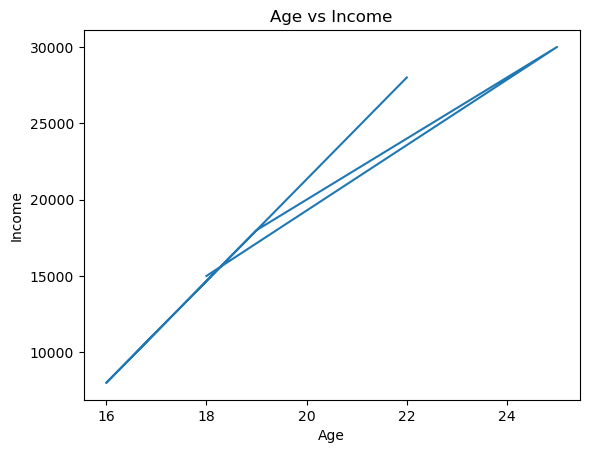

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 

data3 = pd.read_excel('Data.xlsx')

plt.plot(data3['Age'], data3['Income'])
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

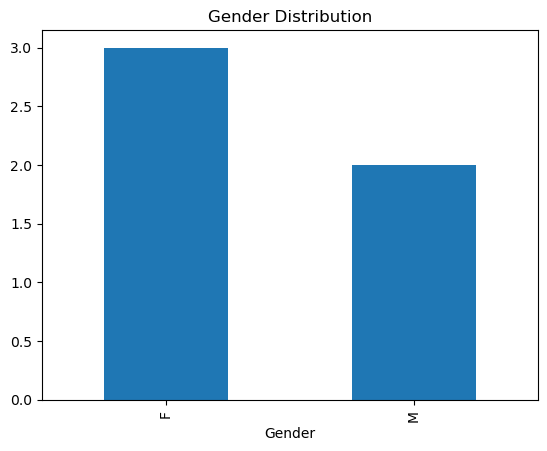

In [11]:
data3['Gender'].value_counts().plot(kind='bar')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.show()

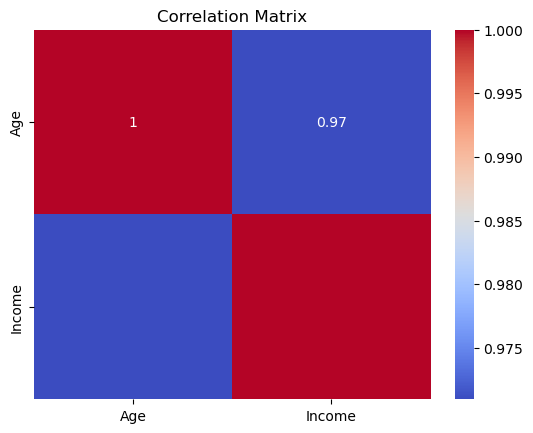

In [12]:
import seaborn as sns 

sns.heatmap(data3.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

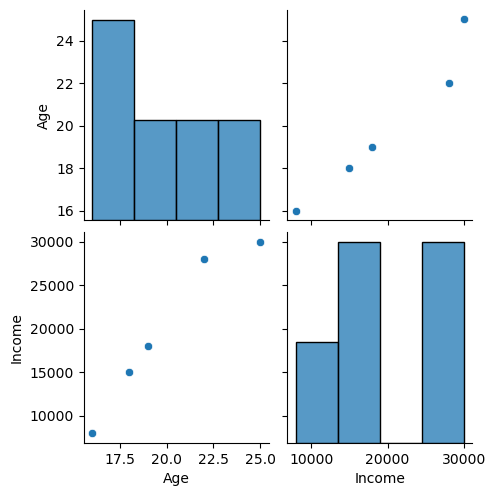

In [13]:
sns.pairplot(data3[['Age', 'Income', 'Gender']])

### Descriptive Statistics 
- Basic Descriptive Statictics 
- Interpreting Statistics 

In [14]:
print(data3.describe())

             Age        Income
count   5.000000      5.000000
mean   20.000000  19800.000000
std     3.535534   9176.055798
min    16.000000   8000.000000
25%    18.000000  15000.000000
50%    19.000000  18000.000000
75%    22.000000  28000.000000
max    25.000000  30000.000000


### Assignment 
Find the median income from the dataset and create a histogram of income distribution.

Income Median: 18000.0


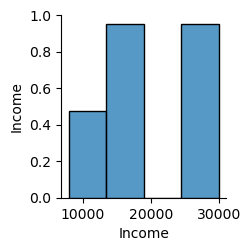

In [17]:
# Median 
income_median = data3['Income'].median()
print(f"Income Median: {income_median}")

# Histogram of income distribution 
sns.pairplot(data3[['Income']])